<a href="https://colab.research.google.com/github/m-hironori/learing-keras/blob/master/3_%E5%A4%9A%E5%80%A4%E5%88%86%E9%A1%9E(Reuters%E3%83%8B%E3%83%A5%E3%83%BC%E3%82%B9).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import keras
keras.__version__

Using TensorFlow backend.


'2.2.5'

# 多値分類(Reutersニュース)

kerasによるモデル作成の基本として、今度は多値分類の例をやってみましょう。 
Reutersニュースのカテゴリ分類をやってみましょう。



## 問題設定


まずは、問題設定を確認してみましょう。



### 問題設定の確認



問題属性 | 問題内容
--- | ---
入力データ形式 | ニューステキスト（英語）
予測すること | カテゴリ
評価指標 | accuracy
評価方法 | ホールドアウト

新聞記事を入力に、カテゴリを当てることが問題設定です。

このデータセットは非常に有名で、テキスト分類ではよくつかわれます。
keras にもこのデータセットがあらかじめ用意されています。

## データ準備

データ準備してみましょう

### データ取得する

In [0]:
from keras.datasets import reuters

(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=10000)

Using TensorFlow backend.


2113536/2110848 [==============================] - 1s 1us/step


データロードの関数が用意されているので、これを呼ぶだけで、データ取得が終わります。

ダウンロード後、num_words=10000で、出現頻度順上位10,000の単語のみをロードしています。

### 内容を確認する

In [0]:
print("\tデータ型")
print(f"訓練データ\t{type(train_data)}")
print(f"訓練ラベル\t{type(train_labels)}")
print(f"テストデータ\t{type(test_data)}")
print(f"テストラベル\t{type(test_labels)}")

	データ型
訓練データ	<class 'numpy.ndarray'>
訓練ラベル	<class 'numpy.ndarray'>
テストデータ	<class 'numpy.ndarray'>
テストラベル	<class 'numpy.ndarray'>


Numpy形式で用意されているので、今回もデータ型はこのままでよさそうです。

In [0]:
import numpy as np

print("\tデータサイズ\t型\t最大値\t最小値")
print(f"訓練データ\t{train_data.shape}\t{train_data.dtype}\t{train_data.max()}\t{train_data.min()}")
print(f"訓練ラベル\t{train_labels.shape}\t{train_labels.dtype}\t{train_labels.max()}\t{train_labels.min()}")
print(f"テストデータ\t{test_data.shape}\t{test_data.dtype}\t{test_data.max()}\t{test_data.min()}")
print(f"テストラベル\t{test_labels.shape}\t{test_labels.dtype}\t{test_labels.max()}\t{test_labels.min()}")

	データサイズ	型	最大値	最小値
訓練データ	(8982,)	object	[1, 9975, 71, 8, 2, 151, 2128, 150, 2257, 13, 1021, 9, 10, 478, 2284, 374, 2682, 209, 1146, 922, 411, 5, 374, 454, 13, 89, 9975, 10, 2658, 5, 2, 6944, 871, 9, 1664, 8338, 1543, 32, 6772, 18, 58, 19, 579, 15, 90, 67, 374, 39, 46, 13, 48, 9975, 8, 4, 586, 336, 777, 10, 47, 999, 18, 358, 3504, 2338, 3340, 6, 1289, 181, 753, 970, 9, 6, 2567, 112, 4, 2266, 334, 116, 22, 2, 1098, 17, 12]	[1, 2, 2, 2, 71, 8, 16, 369, 6, 223, 42, 374, 46, 9, 10, 46, 22, 4, 211, 5, 25, 1016, 354, 2, 323, 13, 4, 29, 798, 94, 156, 54, 29, 4, 49, 257, 186, 5, 6503, 18, 15, 2, 2, 299, 45, 2372, 783, 5, 4, 211, 5, 1016, 354, 2, 16, 8, 4, 211, 40, 5258, 42, 6185, 1005, 4, 49, 75, 8, 16, 33, 500, 78, 73, 2, 2758, 7, 4, 537, 8426, 654, 541, 4, 225, 109, 588, 2, 4, 135, 144, 6, 160, 9, 10, 73, 2, 1638, 3823, 7, 4, 314, 216, 245, 2, 4, 536, 7, 4, 1638, 654, 6, 188, 17, 12]
訓練ラベル	(8982,)	int64	45	0
テストデータ	(2246,)	object	[1, 9931, 1989, 149, 8, 16, 1059, 10, 1311, 6431, 13, 42, 943, 7

よさそうに思いきや、データの内容が、object型でした。また、前回の例と同じように、テキストは前処理されている模様です。

ラベルデータを見ると, 46個のカテゴリがあることがわかります。

### 単語インデックスデータをテキストに戻してみる

In [0]:
# 単語インデックス(単語->インデックス))を　逆転させる(インデックス -> 単語 )
reverse_word_index = dict([(value, key) for (key, value) in reuters.get_word_index().items()])
# imdbデータセットではインデックスオフセットは 3
# 0: パディング用に予約, 1: シーケンス開始を示すために予約, 2: 足きりなどにより未登録の単語用に予約.
# 詳細は https://keras.io/datasets/#reuters-newswire-topics-classification 
# 上記詳細から、https://keras.io/datasets/#imdb-movie-reviews-sentiment-classification がより詳細
decoded = []
for i in train_data[0]:
    if i == 0:
        decoded.append("[PAD]")
    elif i == 1:
        decoded.append("[START]")
    elif i == 2:
        decoded.append("[UNK]")
    else:
        decoded.append(reverse_word_index[i - 3])
print(' '.join(decoded))


557056/550378 [==============================] - 1s 2us/step
[START] [UNK] [UNK] said as a result of its december acquisition of space co it expects earnings per share in 1987 of 1 15 to 1 30 dlrs per share up from 70 cts in 1986 the company said pretax net should rise to nine to 10 mln dlrs from six mln dlrs in 1986 and rental operation revenues to 19 to 22 mln dlrs from 12 5 mln dlrs it said cash flow per share this year should be 2 50 to three dlrs reuter 3


単語インデックスからテキストデータに戻してみましょう。

このように、元のテキストがわかります。どうやら、正規化では、大文字小文字変換程度しかやっていないようです。活用形をもとに戻したりはしていないのがわかります。

これで、データの中身がわかりました。

## ベースライン精度(統計的検出力)

データの統計的な情報から、ランダムに選択した場合の精度を求めてみます。 これから作成するモデルで、これを上回らないと、ランダムに選択したときに負けてしまい、意味がなくなります。

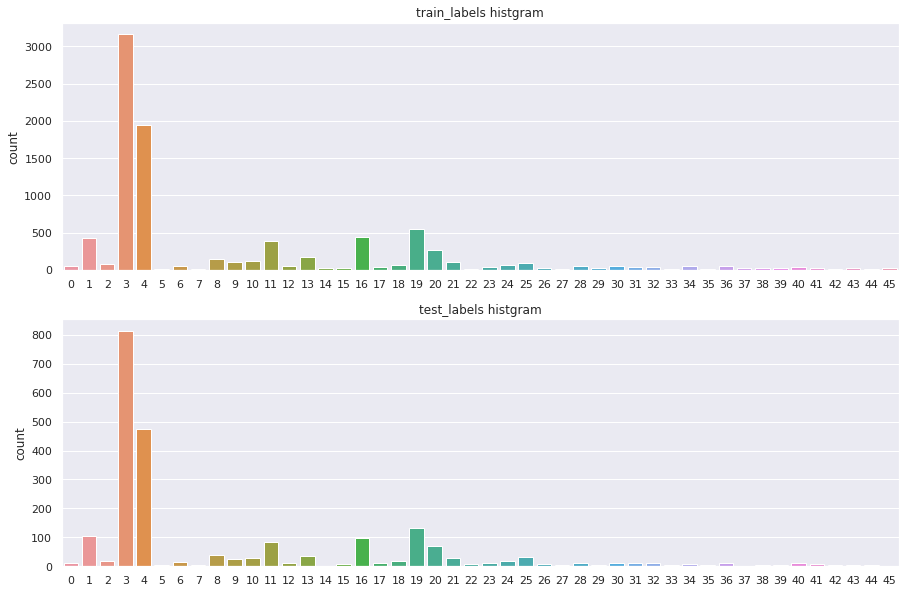

label	train	test
0	55	12
1	432	105
2	74	20
3	3159	813
4	1949	474
5	17	5
6	48	14
7	16	3
8	139	38
9	101	25
10	124	30
11	390	83
12	49	13
13	172	37
14	26	2
15	20	9
16	444	99
17	39	12
18	66	20
19	549	133
20	269	70
21	100	27
22	15	7
23	41	12
24	62	19
25	92	31
26	24	8
27	15	4
28	48	10
29	19	4
30	45	12
31	39	13
32	32	10
33	11	5
34	50	7
35	10	6
36	49	11
37	19	2
38	19	3
39	24	5
40	36	10
41	30	8
42	13	3
43	21	6
44	12	5
45	18	1


In [0]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(color_codes=True)
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(15,10))
sns.countplot(x=train_labels, ax=ax1)
ax1.set_title("train_labels histgram")
sns.countplot(x=test_labels, ax=ax2)
ax2.set_title("test_labels histgram")
plt.show()

print('label\ttrain\ttest')
train_labels_cnt = np.bincount(train_labels)
test_labels_cnt = np.bincount(test_labels)
for label in range(len(train_labels_cnt)):
    print(f'{label}\t{train_labels_cnt[label]}\t{test_labels_cnt[label]}')

訓練データもテストデータもラベルの分布はほぼ同じです。すべての46個カテゴリそれぞれについて、訓練データもテストデータもあります。

しかし、ラベル毎のデータ量はかなり違います。訓練データ量が、一番多いカテゴリは3番で、3159件です。データ量が最も少ないカテゴリは、35番で、10件です。

統計的検出力は、もっとも単純には、46個のカテゴリから一つを選択するので、46分の1で、accuracy が 0.217 % です。

しかし、データの偏りがあることを知っている場合、もう少し良い精度になりますね。

例えば、ラベルが3つあって、全部均等だったら 1/3 で 0.333です。
しかし、訓練データで、 a が 3個, b が 2個, c が 1個だとわかっている場合、それぞれのカテゴリの確率は a が 3/6、 b が 2/6、 cが 1/6 の確率で出せばもう少しよい正解をだせるとわかります。
このとき、テストデータが、a が 6 個, b が 4 個, c が 2 個あった場合、

$
accuracy= \frac{1}{n}  \sum_{l=0}^{k}( n_l \times p_l )
$
$
=\frac{1}{12} (6 \times \frac{3}{6} + 4 \times \frac{2}{6} + 2 \times \frac{1}{6})
$
$
=0.389
$

 